In [2]:
# !pip install pyod

# Anomaly Detection

In [ ]:
- its a process of indentifying unexpected items or events in a dataset

Assumptions
- anomalies only occur very rarely in the data
- features differ from the normal values significantly.

In [ ]:
application

- fraud detection
- network security
- healthcare monitoring
- telecommunication - 

In [ ]:
Algo for AD

- Isolation Forest
- One-class SVM
- Autoencoders

# Univariate Anomaly Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_excel('Superstore.xls')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales Distribution')

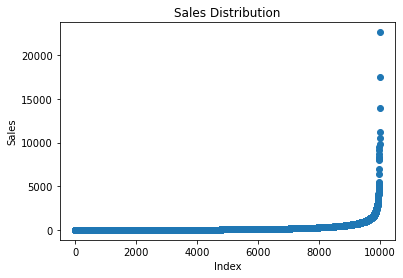

In [6]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title("Sales Distribution")

C:\Users\himan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Sales')

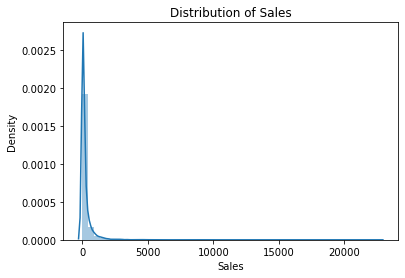

In [7]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")

In [8]:
df["Profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Profit Distribution')

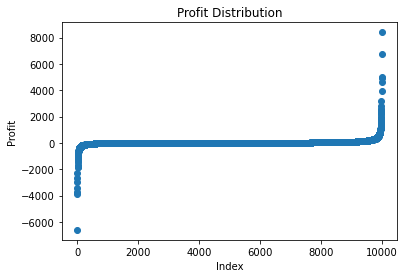

In [9]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('Index')
plt.ylabel('Profit')
plt.title("Profit Distribution")

C:\Users\himan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Profit')

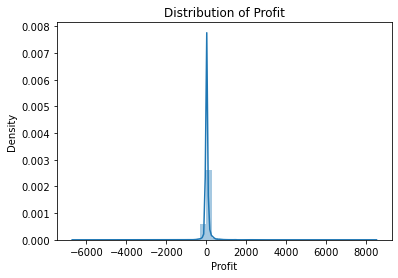

In [10]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")

## Isolation Forest Algorithm

In [ ]:
- detect outliers that returns the anomaly score of each sample

- randomly selecting a feature 
- selecting a random split valueb/w minimum and maximum value of the selected feature



In [12]:
isolation_forest = IsolationForest(n_estimators=100)

isolation_forest.fit(df['Sales'].values.reshape(-1,1))

xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)

anomaly_score = isolation_forest.decision_function(xx)

outlier = isolation_forest.predict(xx)

In [13]:
outlier

array([ 1,  1,  1, ..., -1, -1, -1])

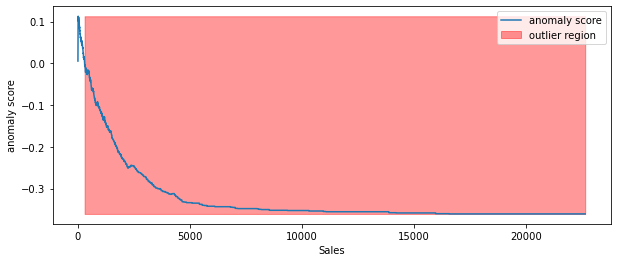

In [14]:
plt.figure(figsize=(10,4))

plt.plot(xx, anomaly_score, label='anomaly score')

plt.fill_between(xx.T[0], 
                 np.min(anomaly_score), 
                 np.max(anomaly_score), 
                 where=outlier==-1, 
                 color='r',
                 alpha=0.4, 
                 label='outlier region')

plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show()

In [15]:
df.iloc[10]

Row ID                                                 11
Order ID                                   CA-2014-115812
Order Date                            2014-06-09 00:00:00
Ship Date                             2014-06-14 00:00:00
Ship Mode                                  Standard Class
Customer ID                                      BH-11710
Customer Name                             Brosina Hoffman
Segment                                          Consumer
Country                                     United States
City                                          Los Angeles
State                                          California
Postal Code                                         90032
Region                                               West
Product ID                                FUR-TA-10001539
Category                                        Furniture
Sub-Category                                       Tables
Product Name     Chromcraft Rectangular Conference Tables
Sales         

In [16]:
isolation_forest = IsolationForest(n_estimators=100)

isolation_forest.fit(df['Profit'].values.reshape(-1,1))

xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)

anomaly_score = isolation_forest.decision_function(xx)

outlier = isolation_forest.predict(xx)

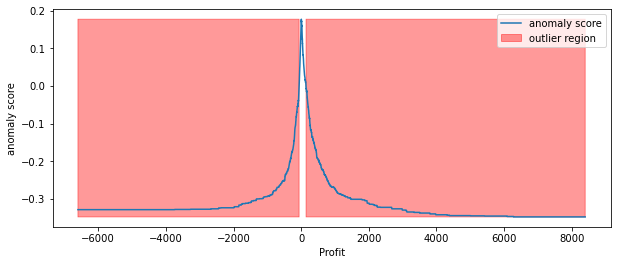

In [17]:
plt.figure(figsize=(10,4))

plt.plot(xx, anomaly_score, label='anomaly score')

plt.fill_between(xx.T[0], 
                 np.min(anomaly_score), 
                 np.max(anomaly_score), 
                 where=outlier==-1, 
                 color='r',
                 alpha=0.4, 
                 label='outlier region')

plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show()

# Multivariate Anlomany Detection

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

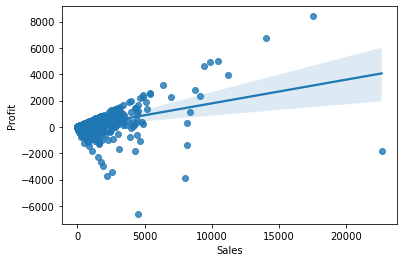

In [18]:
## sales and profit

sns.regplot(x='Sales', y='Profit', data=df)

### Cluster-Based Local Outlier Factor(CBLOF)

In [19]:
from pyod.models.cblof import CBLOF

In [20]:
cols = ['Sales', 'Profit']

df[cols].head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [21]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1))

df[['Sales', 'Profit']] = minmax.fit_transform(df[['Sales', 'Profit']])

df[['Sales', 'Profit']].head()

,Sales,Profit
0,0.011552,0.442794
1,0.032313,0.454639
2,0.000626,0.440458
3,0.042280,0.414464
4,0.000968,0.440168


In [22]:
X1 = df['Sales'].values.reshape(-1,1)
X2 = df['Profit'].values.reshape(-1,1)

X = np.concatenate((X1, X2), axis=1)

In [23]:
outliers_fraction = 0.01

xx, yy = np.meshgrid(np.linspace(0,1, 100), np.linspace(0,1, 100))

clf = CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=0)

clf.fit(X)

# predict the anomaly score
score_pred = clf.decision_function(X) * -1

ypred = clf.predict(X)

ninliers = len(ypred) - np.count_nonzero(ypred)
noutliers = np.count_nonzero(ypred == 1)

In [25]:
plt.figure(figsize=(8,8))

df1 = df

df1['outlier'] = ypred.tolist()

inliers_sales = np.array(df1['Sales'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['Profit'][df1['outlier'] == 0]).reshape(-1,1)

outliers_sales = df1['Sales'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['Profit'][df1['outlier'] == 1].values.reshape(-1,1)

print("Outliers: ", noutliers)
print("Inliers: ", ninliers)


Outliers:  100
Inliers:  9894


<Figure size 576x576 with 0 Axes>

In [ ]:
threshold = 

#### Anomaly Detection using PyTorch

https://visualstudiomagazine.com/articles/2021/04/13/autoencoder-anomaly-detection.aspx


https://www.kaggle.com/code/kimchanyoung/pytorch-anomaly-detection-with-autoencoder